# Simple MNIST MLP Classifier

**Description:** Simple example for Multi Layer Perceptron MNIST Classifier <br>
**Dataset:** Classical MNIST dataset <br>
.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to avoid warning messages
os.environ["TF_CUDNN_USE_AUTOTUNE"] = "0"
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"


import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(42)


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

/home/jaumemanero/RL/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.12) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [2]:
import tensorflow as tf
print(tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    details = tf.config.experimental.get_device_details(gpus[0])
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(details.get("device_name", "Unknown GPU"))
else:
    print("No GPU detected")

2.20.0
No GPU detected


In [3]:

def Analyze_training(h):
# summarize history for accuracy
# history.history.keys() -> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

    Modify layers size and epochs
    Which accuracy can you obtain?

In [4]:
# layers structure
batch_size = 32
epochs = 10
hlayer1 = 64
hlayer2 = 64

    Prepare Data

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train[1,12,12]

np.uint8(19)

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

#####    Definition of a Simple [784:64:64:10] Network

In [9]:
model = Sequential()
model.add(Dense(hlayer1, activation='relu', input_shape=(784,)))
model.add(Dense(hlayer2, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              jit_compile=False,
              metrics=['accuracy'])

/home/jaumemanero/RL/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

    Method Fit Trains Network !

In [10]:
tf.keras.backend.clear_session()

history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test[:5000], y_test[:5000]),
    verbose=1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9159 - loss: 0.2875 - val_accuracy: 0.9390 - val_loss: 0.2030
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9603 - loss: 0.1347 - val_accuracy: 0.9566 - val_loss: 0.1505
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9714 - loss: 0.0989 - val_accuracy: 0.9614 - val_loss: 0.1404
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9767 - loss: 0.0809 - val_accuracy: 0.9612 - val_loss: 0.1461
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9804 - loss: 0.0689 - val_accuracy: 0.9626 - val_loss: 0.1490
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0604 - val_accuracy: 0.9608 - val_loss: 0.1564
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9857 - loss: 0.0542 - val_accuracy: 0.9612 - val_loss: 0.1591
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0487 - 

Test loss: 0.14883580803871155
Test accuracy: 0.9707000255584717
Train accuracy: 0.9863333106040955


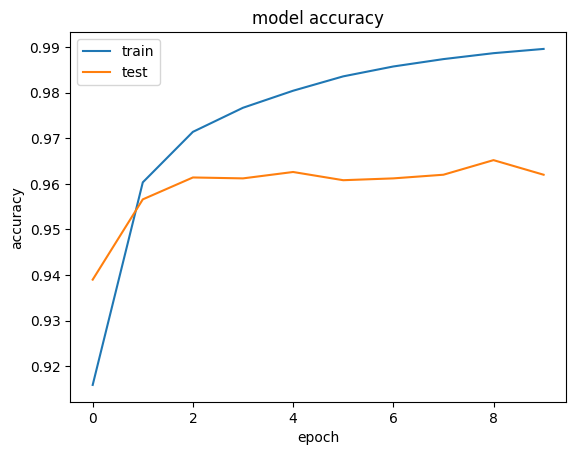

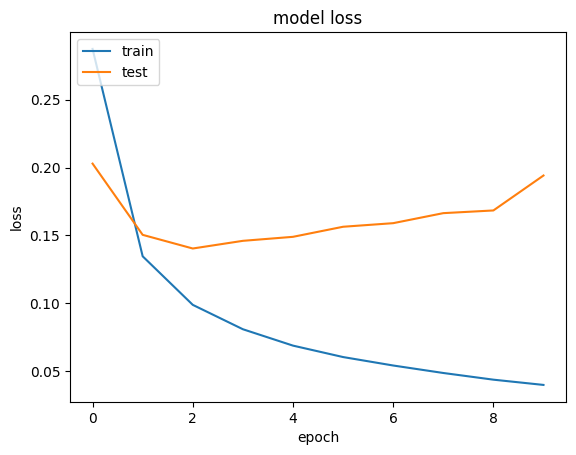

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)